In [1]:
import velvetvae as vt

# general packages
import numpy as np
import pandas as pd
import torch
from scipy.sparse import issparse

# velocity packages
import scanpy as sc
import scvelo as scv
import anndata as ann

# plotting packages
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from IPython.display import clear_output

# color palette object
from colors import colorpalette as colpal

Global seed set to 0
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
import time

In [3]:
adata0 = vt.pp.read("../data/celltyped_adata.h5ad")
adata0 = adata0[adata0.obs.cell_annotation!='other']

adata0

View of AnnData object with n_obs × n_vars = 44713 × 24967
    obs: 'X_TC_alpha', 'total_TC_alpha', 'unspliced_TC_alpha', 'spliced_TC_alpha', 'p_e', 'p_c_TC', 'sample', 'timepoint', 'rep', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'label_rate', 'doublet_score', 'marker_based_classification', 'cell_annotation'
    layers: 'new', 'old', 'total'

In [4]:
neural_types = ['Early_Neural','Neural','pMN','p3','FP','MN','V3']

neural = adata0[[ct in neural_types for ct in adata0.obs.cell_annotation]]

neural_genes = vt.pp.select_genes(
    neural[neural.obs.rep!='r4'], 
    n_variable_genes=3000, 
    stratify_obs='rep')

In [5]:
neural = vt.pp.size_normalize(
    neural, 
    genes=neural_genes, 
    total_layer='total', 
    new_layer='new',
    unsparsify=True
)

In [47]:
reps = []
for _ in range(3):
    times = []
    for size in tqdm(np.linspace(500,25000,11)):
        idx = np.random.choice(neural.shape[0], size=int(size))
        sub = neural[idx].copy()

        vt.pp.neighborhood(sub)

        vt.ut.set_seed(0)

        vt.md.Velvet.setup_anndata(sub, x_layer='total', n_layer='new', knn_layer='knn_index')

        submodel = vt.md.Velvet(
            sub,
            n_latent = 50,
            linear_decoder = True,
            neighborhood_space="latent_space",
            biophysical_model = "simple",
            gamma_mode = "learned",
            labelling_time = 2.0,
        )

        submodel.setup_model()

        start_time = time.time()
        submodel.train(
            batch_size = sub.shape[0],
            max_epochs = 50, 
            freeze_vae_after_epochs = 200,
            constrain_vf_after_epochs = 200,
            lr=0.001,
        )
        end_time = time.time()
        total_time = end_time - start_time
        times.append(total_time / 50)
    reps.append(times)
reps=np.array(reps)


  0%|          | 0/11 [00:00<?, ?it/s]

Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:01<00:00, 42.53it/s, loss=2.06e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:01<00:00, 41.62it/s, loss=2.06e+03, v_num=1]


  9%|▉         | 1/11 [00:02<00:28,  2.82s/it]

Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:03<00:00, 13.29it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:03<00:00, 13.25it/s, loss=2.07e+03, v_num=1]

 18%|█▊        | 2/11 [00:09<00:46,  5.19s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:06<00:00,  7.05it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:06<00:00,  7.20it/s, loss=2.07e+03, v_num=1]

 27%|██▋       | 3/11 [00:22<01:10,  8.83s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:09<00:00,  4.65it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:09<00:00,  5.09it/s, loss=2.07e+03, v_num=1]

 36%|███▋      | 4/11 [00:43<01:35, 13.61s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:13<00:00,  3.64it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s, loss=2.07e+03, v_num=1]

 45%|████▌     | 5/11 [01:15<02:00, 20.01s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:16<00:00,  3.04it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:16<00:00,  3.06it/s, loss=2.07e+03, v_num=1]

 55%|█████▍    | 6/11 [01:56<02:17, 27.44s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:18<00:00,  3.20it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:18<00:00,  2.73it/s, loss=2.07e+03, v_num=1]

 64%|██████▎   | 7/11 [02:53<02:27, 36.79s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:22<00:00,  2.23it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:22<00:00,  2.27it/s, loss=2.07e+03, v_num=1]

 73%|███████▎  | 8/11 [03:56<02:15, 45.30s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:22<00:00,  2.33it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:22<00:00,  2.23it/s, loss=2.07e+03, v_num=1]

 82%|████████▏ | 9/11 [05:18<01:53, 56.76s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:23<00:00,  1.87it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:23<00:00,  2.17it/s, loss=2.07e+03, v_num=1]

 91%|█████████ | 10/11 [06:47<01:06, 66.57s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:30<00:00,  1.49it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:30<00:00,  1.65it/s, loss=2.07e+03, v_num=1]

100%|██████████| 11/11 [08:57<00:00, 48.88s/it]


  0%|          | 0/11 [00:00<?, ?it/s]

Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:01<00:00, 38.36it/s, loss=2.06e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:01<00:00, 38.92it/s, loss=2.06e+03, v_num=1]


  9%|▉         | 1/11 [00:02<00:25,  2.50s/it]

Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:04<00:00, 12.07it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:04<00:00, 11.89it/s, loss=2.07e+03, v_num=1]

 18%|█▊        | 2/11 [00:09<00:48,  5.43s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:07<00:00,  7.26it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:07<00:00,  6.88it/s, loss=2.07e+03, v_num=1]

 27%|██▋       | 3/11 [00:23<01:14,  9.29s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:09<00:00,  5.22it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:10<00:00,  5.00it/s, loss=2.07e+03, v_num=1]


 36%|███▋      | 4/11 [00:45<01:38, 14.13s/it]

Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:12<00:00,  3.85it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:12<00:00,  3.93it/s, loss=2.07e+03, v_num=1]

 45%|████▌     | 5/11 [01:15<01:59, 19.87s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:15<00:00,  3.21it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s, loss=2.07e+03, v_num=1]

 55%|█████▍    | 6/11 [01:55<02:13, 26.62s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:14<00:00,  3.28it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:14<00:00,  3.38it/s, loss=2.07e+03, v_num=1]

 64%|██████▎   | 7/11 [02:39<02:09, 32.26s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:18<00:00,  2.29it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:18<00:00,  2.66it/s, loss=2.07e+03, v_num=1]

 73%|███████▎  | 8/11 [03:37<02:01, 40.55s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:24<00:00,  2.03it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:24<00:00,  2.06it/s, loss=2.07e+03, v_num=1]

 82%|████████▏ | 9/11 [05:10<01:54, 57.00s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:25<00:00,  2.14it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:25<00:00,  1.97it/s, loss=2.07e+03, v_num=1]

 91%|█████████ | 10/11 [07:02<01:14, 74.09s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:28<00:00,  1.94it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:28<00:00,  1.73it/s, loss=2.07e+03, v_num=1]

100%|██████████| 11/11 [09:24<00:00, 51.28s/it]


  0%|          | 0/11 [00:00<?, ?it/s]

Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:01<00:00, 48.29it/s, loss=2.06e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:01<00:00, 46.86it/s, loss=2.06e+03, v_num=1]


  9%|▉         | 1/11 [00:02<00:21,  2.15s/it]

Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:03<00:00, 14.76it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:03<00:00, 14.84it/s, loss=2.07e+03, v_num=1]

 18%|█▊        | 2/11 [00:08<00:41,  4.63s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:05<00:00,  8.33it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:05<00:00,  8.61it/s, loss=2.07e+03, v_num=1]

 27%|██▋       | 3/11 [00:20<01:03,  7.89s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:09<00:00,  5.02it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:09<00:00,  5.04it/s, loss=2.07e+03, v_num=1]


 36%|███▋      | 4/11 [00:41<01:31, 13.06s/it]

Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:13<00:00,  3.84it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:13<00:00,  3.82it/s, loss=2.07e+03, v_num=1]

 45%|████▌     | 5/11 [01:11<01:56, 19.39s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:15<00:00,  3.68it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:15<00:00,  3.17it/s, loss=2.07e+03, v_num=1]

 55%|█████▍    | 6/11 [01:53<02:14, 26.90s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:15<00:00,  2.64it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:15<00:00,  3.16it/s, loss=2.07e+03, v_num=1]

 64%|██████▎   | 7/11 [02:41<02:14, 33.69s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:21<00:00,  2.27it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:21<00:00,  2.34it/s, loss=2.07e+03, v_num=1]

 73%|███████▎  | 8/11 [03:54<02:19, 46.47s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:20<00:00,  2.53it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:20<00:00,  2.49it/s, loss=2.07e+03, v_num=1]

 82%|████████▏ | 9/11 [05:16<01:54, 57.40s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:26<00:00,  1.85it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s, loss=2.07e+03, v_num=1]

 91%|█████████ | 10/11 [07:15<01:16, 76.40s/it]


Using ScanPy methods to calculate distances, indices, connectivities, transitions, ... done! 
KNN indices for Velvet stored in .obsm['knn_index'].
Dense similarity transition matrix for Velvet stored in .obsm['Ts'].
INFO     Generating sequential column names                                                                        


bypassing sigterm
bypassing sigterm
bypassing sigterm
Multiprocessing is handled by SLURM.
bypassing sigterm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
bypassing sigterm
bypassing sigterm
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
SLURM auto-requeueing enabled. Setting signal handlers.


Epoch 50/50: 100%|██████████| 50/50 [00:29<00:00,  1.99it/s, loss=2.07e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s, loss=2.07e+03, v_num=1]

100%|██████████| 11/11 [09:49<00:00, 53.56s/it] 

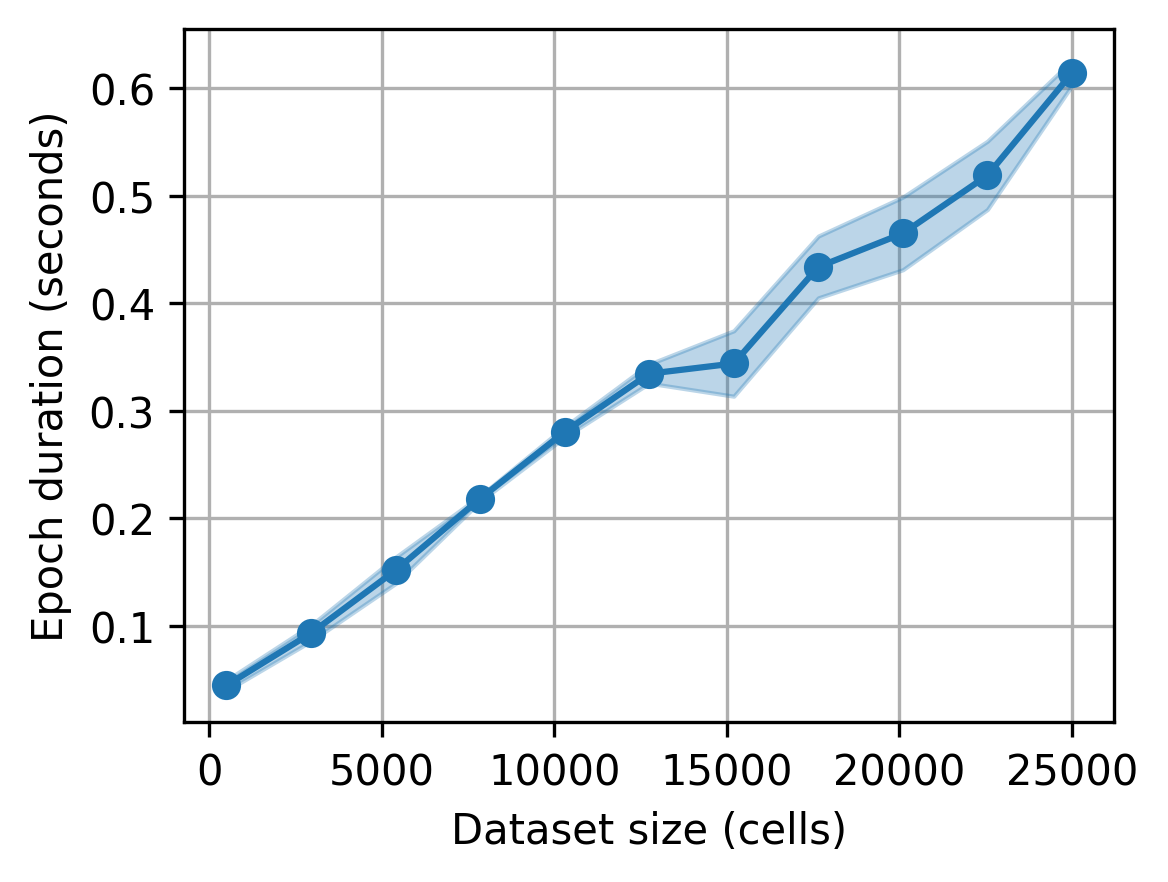

In [50]:
x = np.linspace(500,25000,11)

plt.figure(figsize=(4,3), dpi=300)
plt.plot(x,reps.mean(0))
plt.scatter(x,reps.mean(0), zorder=33)
plt.fill_between(
    x,
    reps.mean(0) + reps.std(0), reps.mean(0) - reps.std(0), 
    color='tab:blue', 
    alpha=0.3,
    zorder=2323
)
plt.ylabel("Epoch duration (seconds)")
plt.xlabel("Dataset size (cells)")
plt.grid(0.1)
plt.savefig('../figures/2.0.3_training_time_velvet.png', transparent=True)
plt.show()